C:\Users\uppal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


✅ Loading and Preprocessing Data...
Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 43428 to 98359
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20

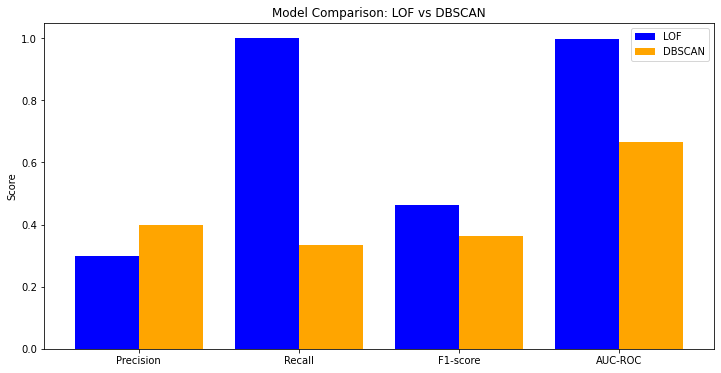

✅ Saving Results to CSV...
Results saved to: creditcard_fraud_lof_dbscan_results.csv


In [1]:
# -------------------------------------
# 📥 Import Libraries
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import psutil

# -------------------------------------
# 📂 Load and Preprocess Dataset
# -------------------------------------
print("✅ Loading and Preprocessing Data...")

# Path to your dataset
file_path = r"D:\Website Codes\creditcard.csv\creditcard.csv"

# Load a smaller sample for testing
data = pd.read_csv(file_path).sample(n=10000, random_state=42)

# Display dataset info
print("Dataset loaded successfully!")
print(data.info())

# Separate features and labels
X = data.drop(columns=['Class'])   # Features
y = data['Class']                   # Labels (0 = Normal, 1 = Fraud)

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Memory usage log
def log_memory_usage():
    mem = psutil.virtual_memory()
    print(f"Memory Usage: {mem.percent}% | Available: {mem.available / 1024 ** 2:.2f} MB")

log_memory_usage()

# -------------------------------------
# 🚀 Local Outlier Factor (LOF)
# -------------------------------------
print("✅ Running Local Outlier Factor...")

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X_test)

# Map LOF predictions to binary labels (1 = anomaly, 0 = normal)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

log_memory_usage()

# -------------------------------------
# 🚀 DBSCAN (Density-Based Clustering)
# -------------------------------------
print("✅ Running DBSCAN...")

# Adjust parameters for better performance
dbscan = DBSCAN(eps=0.9, min_samples=20)
dbscan.fit(X_test)

# Map DBSCAN labels to anomaly/normal labels
y_pred_dbscan = np.where(dbscan.labels_ == -1, 1, 0)

log_memory_usage()

# -------------------------------------
# ✅ Evaluation and Comparison
# -------------------------------------
print("✅ Evaluating Models...")

def evaluate_model(y_true, y_pred, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    pr_auc = roc_auc_score(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {pr_auc:.4f}")

    return precision, recall, f1, pr_auc

# Evaluate LOF
lof_metrics = evaluate_model(y_test, y_pred_lof, "Local Outlier Factor (LOF)")

# Evaluate DBSCAN
dbscan_metrics = evaluate_model(y_test, y_pred_dbscan, "DBSCAN")

# -------------------------------------
# 📊 Visualization: Comparison of Models
# -------------------------------------
print("✅ Visualizing Results...")

# Bar plot of metrics
metrics = ['Precision', 'Recall', 'F1-score', 'AUC-ROC']
lof_scores = lof_metrics
dbscan_scores = dbscan_metrics

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics))

# Plot LOF and DBSCAN metrics
ax.bar(x - 0.2, lof_scores, width=0.4, label='LOF', color='blue')
ax.bar(x + 0.2, dbscan_scores, width=0.4, label='DBSCAN', color='orange')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Model Comparison: LOF vs DBSCAN')
ax.legend()

plt.show()

# -------------------------------------
# 📉 Save Results to CSV
# -------------------------------------
print("✅ Saving Results to CSV...")

# Save predictions
results = pd.DataFrame({
    "True_Label": y_test,
    "LOF_Prediction": y_pred_lof,
    "DBSCAN_Prediction": y_pred_dbscan
})

# Save the results
output_file = "creditcard_fraud_lof_dbscan_results.csv"
results.to_csv(output_file, index=False)
print(f"Results saved to: {output_file}")
